In [1]:
suppressPackageStartupMessages({library(dplyr)
library(Seurat)
library(readr)
library(SingleCellExperiment, quietly = TRUE)
library(scater, quietly = TRUE)
library(tidyr)
library(purrr)
library(cowplot)
library(ggrepel)
library(viridis)
library(ggdendro)
library(gridExtra)
library(egg)
library(pheatmap)})

Warning message:
"package 'Seurat' was built under R version 3.6.2"Warning message:
"package 'matrixStats' was built under R version 3.6.2"

In [3]:
load("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/FIgure6_object.Robj", verbose = T)

Loading objects:
  Figure6.Object


In [10]:
auc_mtx <- read.csv("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/auc_mtx_post_embryo_norm_711.csv")

In [11]:
colnames(auc_mtx)[2:length(colnames(auc_mtx))] <- gsub('.{0,3}$', '', colnames(auc_mtx)[2:length(colnames(auc_mtx))])

In [12]:
auc_mtx_matrix <- t(as.matrix(data.frame(auc_mtx[,-1], row.names = auc_mtx$Cell)))

In [18]:
meta_data <- as.data.frame(Figure6.Object@meta.data)
meta_data$Cell <- rownames(meta_data)

resource_JP <- read.csv("Figure6.Resources.csv")
colnames(resource_JP) <- c("Cell", "Batch_John")

idents_JP <- read.csv("Figure6.Idents.csv")
colnames(idents_JP) <- c("Cell", "cell_type_John")

meta_data <- meta_data %>%
                left_join(resource_JP, by = "Cell") %>%
                left_join(idents_JP, by = "Cell")
rownames(meta_data) <- meta_data$Cell

Warning message:
"Column `Cell` joining character vector and factor, coercing into character vector"Warning message:
"Column `Cell` joining character vector and factor, coercing into character vector"

In [19]:
seurat_EPSC_post_embryo_scenic <- CreateSeuratObject(counts = auc_mtx_matrix, meta.data = meta_data, min.cells = 0, min.features = 0, project = "AUC")
# Split object
seurat_EPSC_post_embryo_scenic_int.list <- SplitObject(seurat_EPSC_post_embryo_scenic, split.by = "Batch_John")

In [21]:
seurat_EPSC_post_embryo_scenic_int.anchors <- FindIntegrationAnchors(object.list = seurat_EPSC_post_embryo_scenic_int.list[-c(3,7)],
                                                         
                                                         dims = 1:20, 
                                                         k.filter = 200, 
                                                         
                                                         verbose = F)
                                                         

No variable features found for object1 in the object.list. Running FindVariableFeatures ...
No variable features found for object2 in the object.list. Running FindVariableFeatures ...
No variable features found for object3 in the object.list. Running FindVariableFeatures ...
No variable features found for object4 in the object.list. Running FindVariableFeatures ...
No variable features found for object5 in the object.list. Running FindVariableFeatures ...
No variable features found for object6 in the object.list. Running FindVariableFeatures ...


In [22]:
seurat_EPSC_post_embryo_scenic_int.integrated <- IntegrateData(anchorset = seurat_EPSC_post_embryo_scenic_int.anchors, dims = 1:20, features.to.integrate = 1:333)

Merging dataset 4 into 1
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 6 into 5
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 3 into 2
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 5 6 into 1 4
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Merging dataset 1 4 5 6 into 2 3
Extracting anchors for merged samples
Finding integration vectors
Finding integration vector weights
Integrating data
Warning message:
"Adding a command log without an assay associated with it"

In [23]:
DefaultAssay(seurat_EPSC_post_embryo_scenic_int.integrated) <- "integrated"

In [24]:
seurat_EPSC_post_embryo_scenic_int.integrated <- ScaleData(seurat_EPSC_post_embryo_scenic_int.integrated, verbose = FALSE)

In [25]:
seurat_EPSC_post_embryo_scenic_int.integrated <- RunPCA(seurat_EPSC_post_embryo_scenic_int.integrated, npcs = 25, verbose = FALSE)
seurat_EPSC_post_embryo_scenic_int.integrated <- RunUMAP(seurat_EPSC_post_embryo_scenic_int.integrated, reduction = "pca", dims = 1:25, min.dist = 0.25)

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"17:35:34 UMAP embedding parameters a = 1.121 b = 1.057
17:35:34 Read 16962 rows and found 25 numeric columns
17:35:34 Using Annoy for neighbor search, n_neighbors = 30
17:35:34 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
17:35:36 Writing NN index file to temp file /tmp/Rtmpjjlp9w/file58d6196a4e31
17:35:36 Searching Annoy index using 1 thread, search_k = 3000
17:35:42 Annoy recall = 100%
17:35:43 Commencing smooth kNN distance calibration using 1 thread
17:35:45 Initializing from normalized Laplacian + noise
17:35:45 Commencing optimizatio

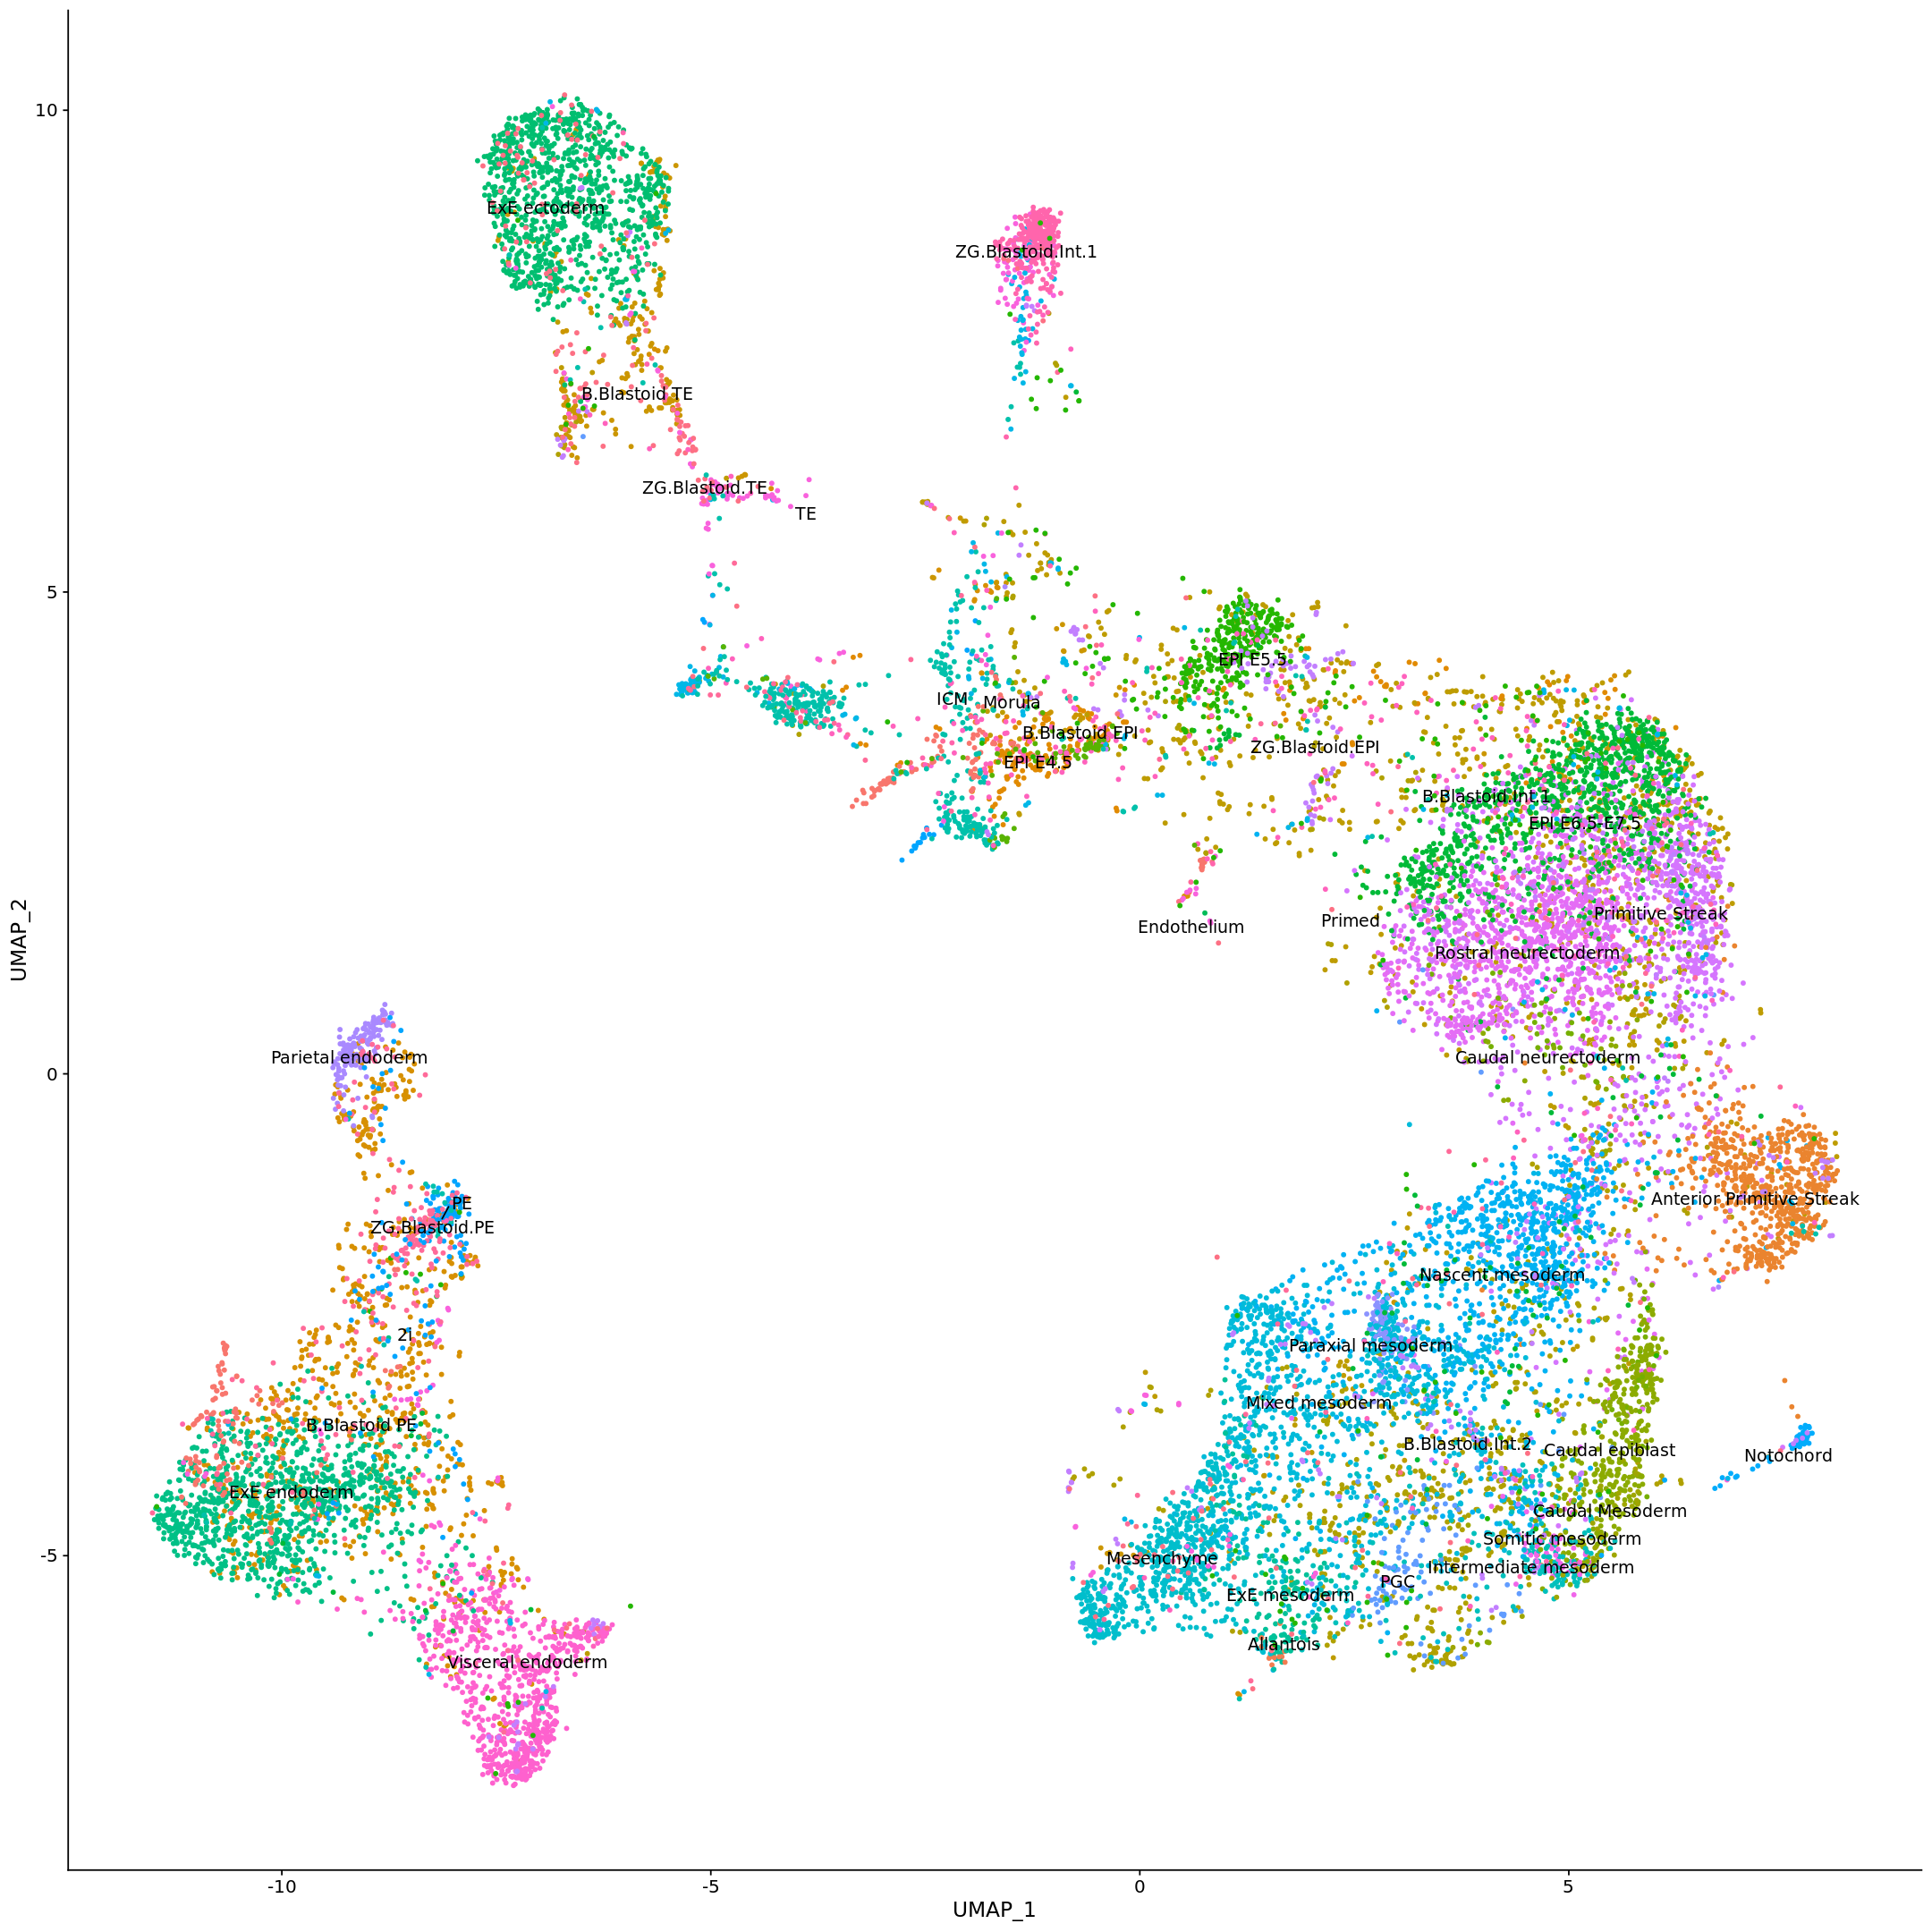

In [28]:
options(repr.plot.width=18, repr.plot.height = 18)
DimPlot(seurat_EPSC_post_embryo_scenic_int.integrated, reduction = "umap", label = TRUE, group.by = "cell_type_John",
    repel = T, pt.size = 1) +NoLegend()

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


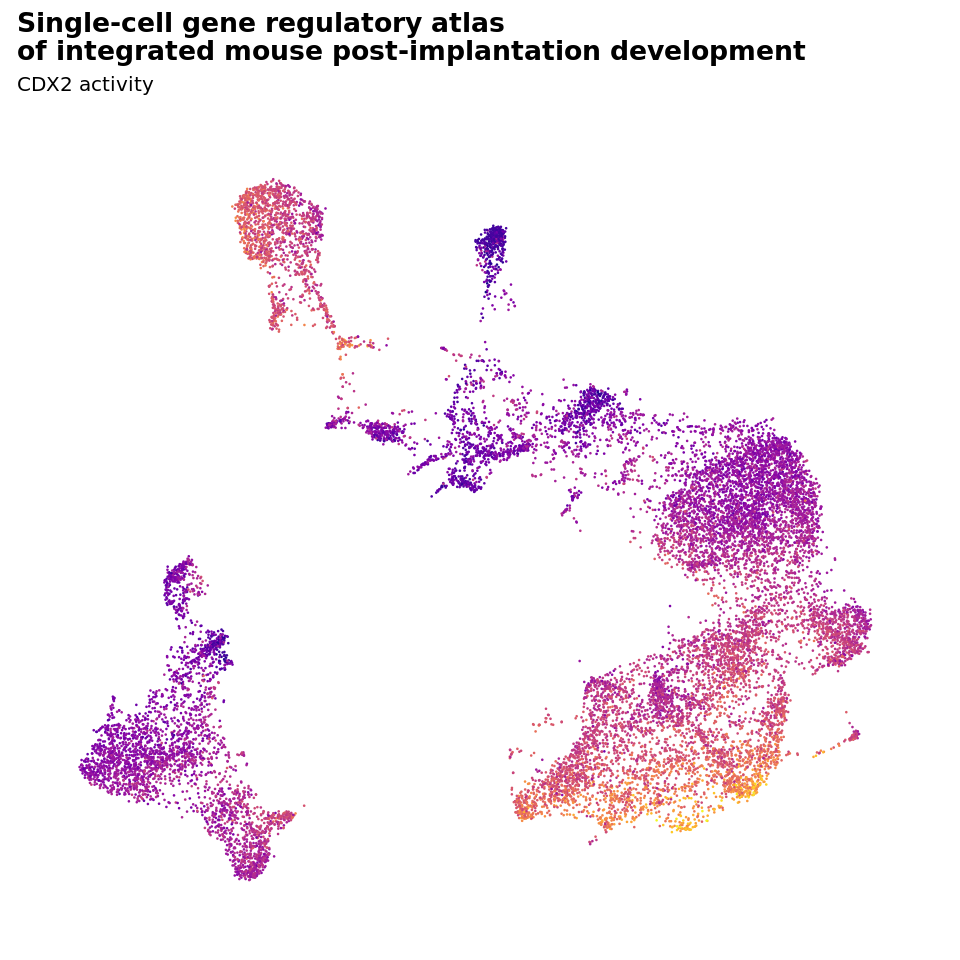

In [26]:
options(repr.plot.width=8, repr.plot.height = 8)
FeaturePlot(seurat_EPSC_post_embryo_scenic_int.integrated, features = c('Cdx2'), reduction = "umap", pt.size = .1)+ scale_color_viridis(option = "C") + labs(title = "Single-cell gene regulatory atlas\nof integrated mouse post-implantation development",
              subtitle = "CDX2 activity") +
theme(
  plot.title = element_text(hjust = 0),
  plot.subtitle = element_text(hjust = 0))+
theme(axis.line=element_blank(),axis.text.x=element_blank(),
          axis.text.y=element_blank(),axis.ticks=element_blank(),
          axis.title.x=element_blank(),
          axis.title.y=element_blank(),legend.position="none",
          panel.background=element_blank(),panel.border=element_blank(),panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),plot.background=element_blank())

#### Highlight each cell type on a seprate plot

In [ ]:
# Series of all cell types highlighted individually on single UMAP

DimPlot_highlight <- function(object, cells.highlight, color = "orchid3"){
    
    cells <- list(cells.highlight ,WhichCells(object, idents = cells.highlight))
    
    DimPlot(object, label=F, 
        cells.highlight= cells , 
        cols.highlight = color, 
        cols= "grey",
            sizes.highlight = 0.7) + 
    ggtitle(cells.highlight) + theme_void() + theme(plot.title = element_text(hjust = 0.5)) + NoLegend() 
    
}

# Generate list of plots
plot <- list()
cell_types <- unique(Idents(seurat_EPSC_post_embryo_scenic_int.integrated))

for (i in seq(cell_types)) {
  plot[[i]] <- DimPlot_highlight(seurat_EPSC_post_embryo_scenic_int.integrated, cells.highlight = cell_types[i]) 
}

# Export to pdf
       pdf("UMAP_post_impl_HIGHLIGHTS.pdf", onefile = TRUE, useDingbats = TRUE, width = 9, height = 9)
         for (i in seq(cell_types)){
          plot(plot[[i]])
            }
       dev.off()

#### Heatmap with regulon activity of lineage markers

Finished averaging RNA for cluster Morula
Finished averaging RNA for cluster ICM
Finished averaging RNA for cluster 2i
Finished averaging RNA for cluster EPI E4.5
Finished averaging RNA for cluster EPI E5.5
Finished averaging RNA for cluster EPI E6.5-E7.5
Finished averaging RNA for cluster B.Blastoid EPI
Finished averaging RNA for cluster ZG.Blastoid.EPI
Finished averaging RNA for cluster PE
Finished averaging RNA for cluster B.Blastoid PE
Finished averaging RNA for cluster ZG.Blastoid.PE
Finished averaging RNA for cluster Visceral endoderm
Finished averaging RNA for cluster Parietal endoderm
Finished averaging RNA for cluster ExE endoderm
Finished averaging RNA for cluster TE
Finished averaging RNA for cluster B.Blastoid TE
Finished averaging RNA for cluster ZG.Blastoid.TE
Finished averaging RNA for cluster ExE ectoderm
Finished averaging RNA for cluster B.Blastoid.Int.1
Finished averaging RNA for cluster B.Blastoid.Int.2
Finished averaging RNA for cluster ZG.Blastoid.Int.1
Finished a

An object of class Seurat 
666 features across 39 samples within 2 assays 
Active assay: RNA (333 features)
 1 other assay present: integrated

Warning message in DoHeatmap(cluster.averages, features = c("Gata2", "Gata3", "Cdx2", :
"The following features were omitted as they were not found in the scale.data slot for the RNA assay: Mesp1, Sox17, Tcf7l1, Klf4, Zfp42, Foxd4, Tead3"Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


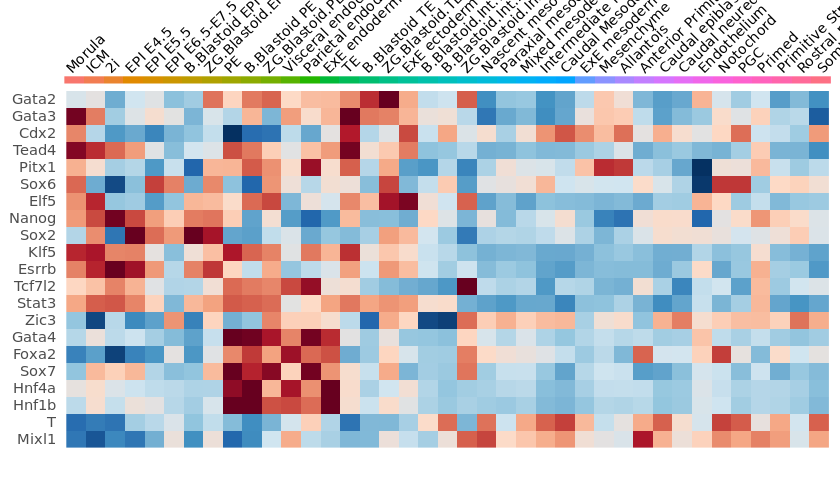

In [33]:
DefaultAssay(seurat_EPSC_post_embryo_scenic_int.integrated) <- "RNA"
all.genes <- rownames(seurat_EPSC_post_embryo_scenic)
Idents(seurat_EPSC_post_embryo_scenic_int.integrated) <- "cell_type_John"
levels(seurat_EPSC_post_embryo_scenic_int.integrated) <- c('Morula',
'ICM',
'2i',
'EPI E4.5',
'EPI E5.5',
'EPI E6.5-E7.5',
'B.Blastoid EPI',
'ZG.Blastoid.EPI',
'PE',
'B.Blastoid PE',
'ZG.Blastoid.PE',
'Visceral endoderm',
'Parietal endoderm',
'ExE endoderm',

'TE',
'B.Blastoid TE',
'ZG.Blastoid.TE',
'ExE ectoderm',

'B.Blastoid.Int.1',
'B.Blastoid.Int.2',
'ZG.Blastoid.Int.1',

'Nascent mesoderm',
'Paraxial mesoderm',
'Mixed mesoderm',
'Intermediate mesoderm',
'Caudal Mesoderm',
'ExE mesoderm',
'Mesenchyme',
'Allantois',
'Anterior Primitive Streak',
'Caudal epiblast',
'Caudal neurectoderm',
'Endothelium',
'Notochord',
'PGC',
'Primed',
'Primitive Streak',
'Rostral neurectoderm',
'Somitic mesoderm')
cluster.averages <- AverageExpression(seurat_EPSC_post_embryo_scenic_int.integrated, return.seurat = TRUE)
cluster.averages <- ScaleData(cluster.averages, features = all.genes)
cluster.averages




options(repr.plot.width=7, repr.plot.height = 4)
heatmap_regs <- DoHeatmap(cluster.averages, features = c("Gata2","Gata3","Cdx2","Tead4","Tead3","Pitx1","Sox6","Foxd4","Elf5", # TE
                                         "Nanog","Sox2","Zfp42","Klf4","Klf5","Esrrb","Tcf7l2","Tcf7l1",  "Stat3", "Zic3", #Epi
                                          "Gata4","Foxa2","Sox17","Sox7","Hnf4a","Hnf1b", #PE
                                         "T", "Mesp1","Mixl1") # Mesoderm
                                          , size = 3,draw.lines = FALSE)+ scale_fill_gradientn(colors = rev(RColorBrewer::brewer.pal(n = 10, name = "RdBu"))) 
heatmap_regs + NoLegend()

#### Display expression of each marker

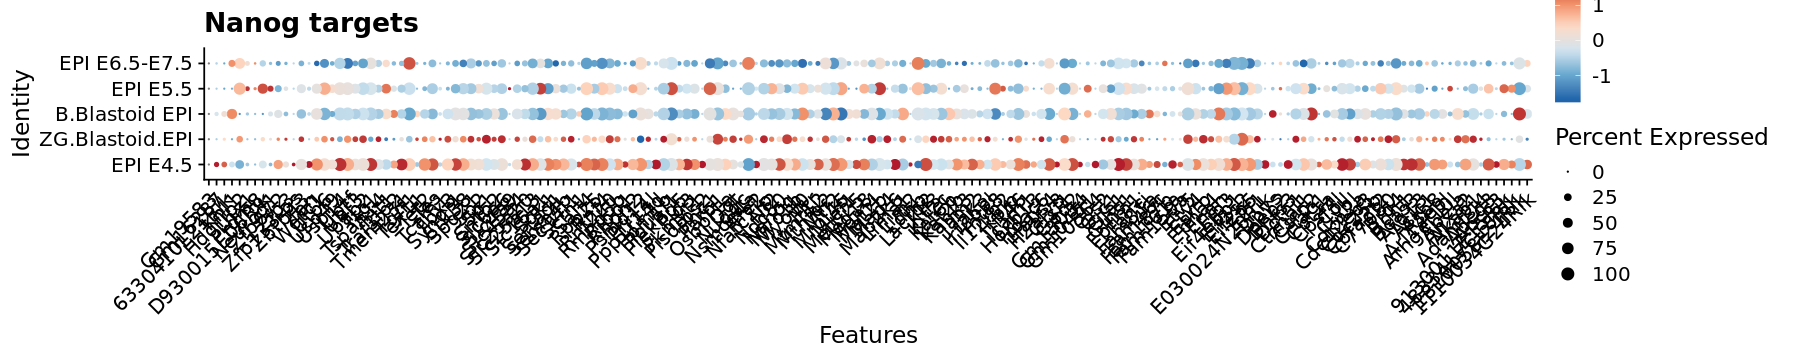

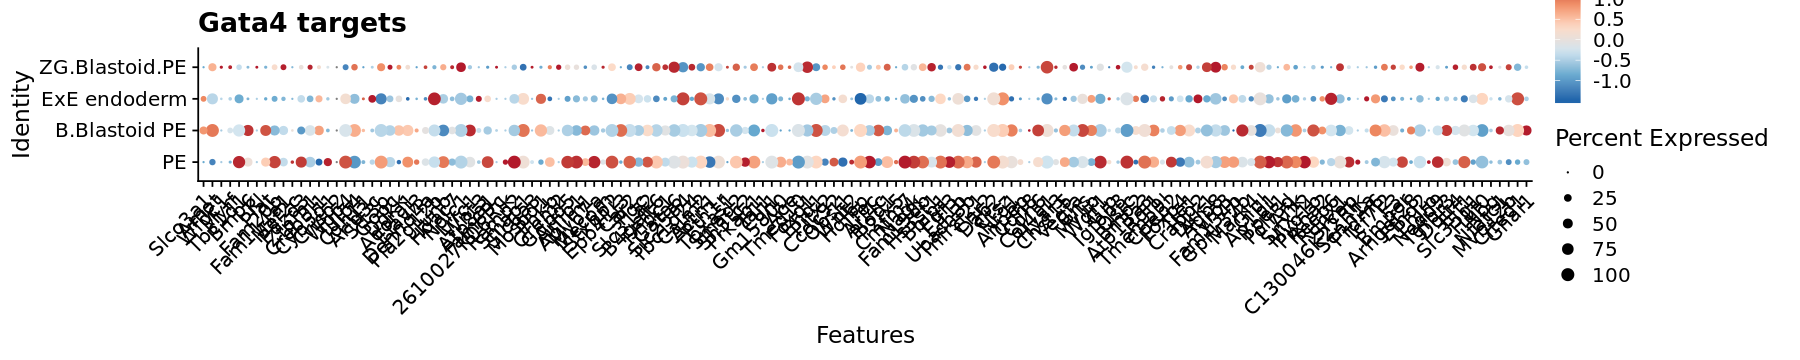

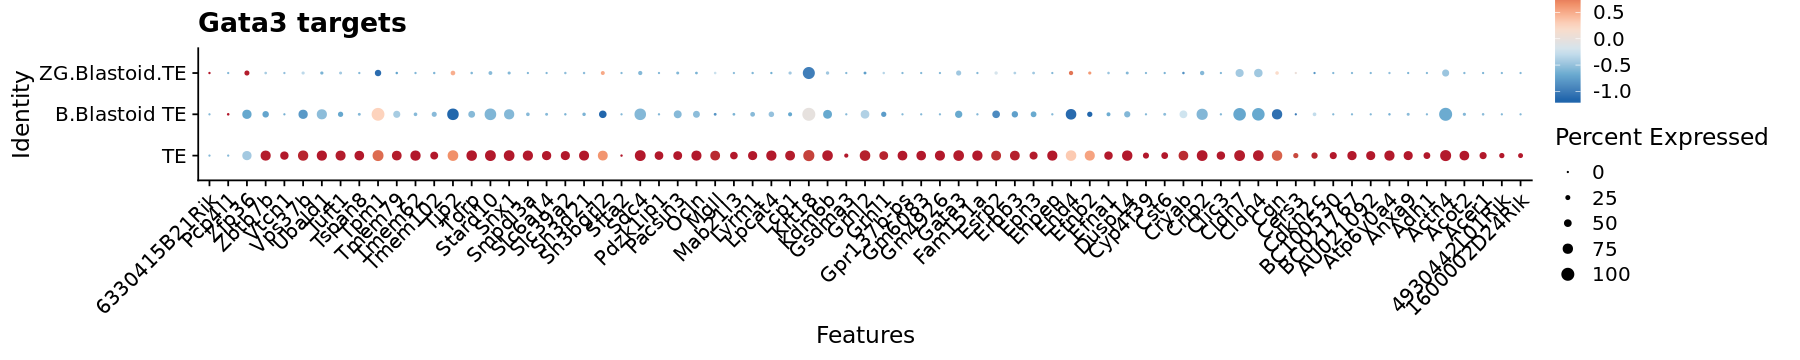

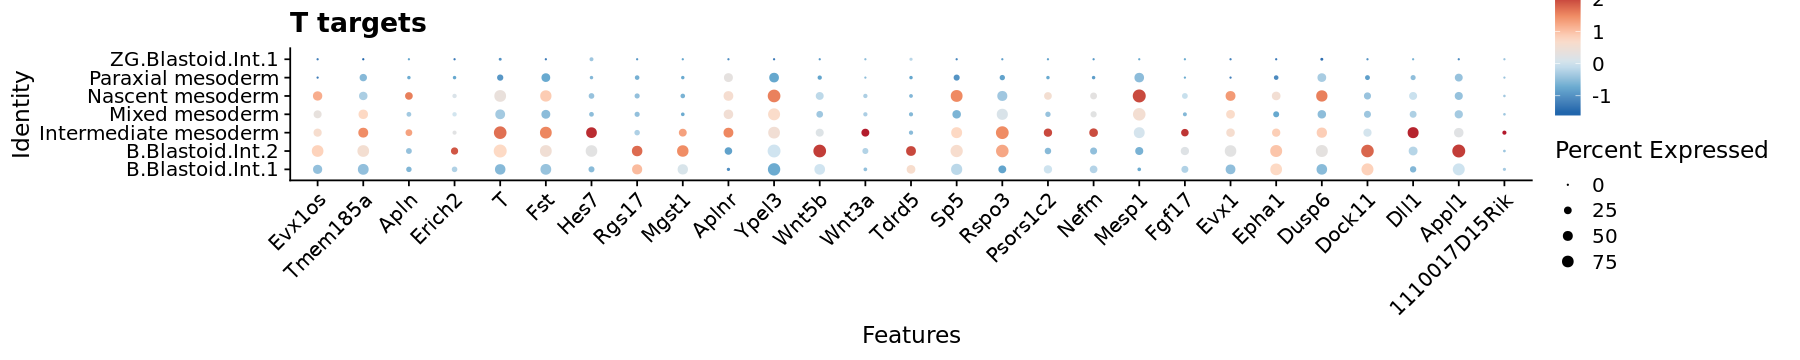

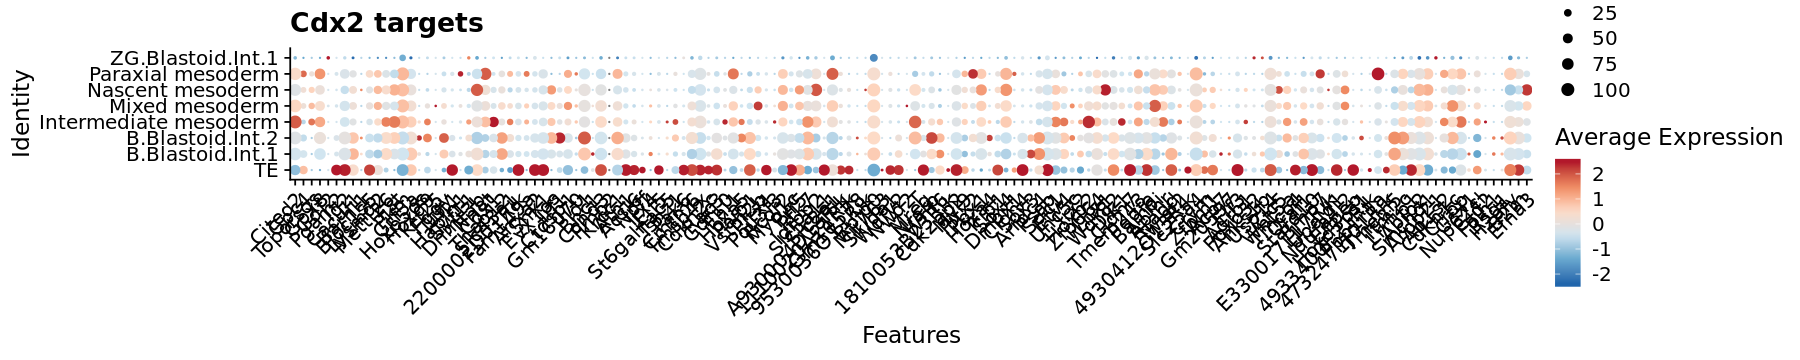

In [46]:
## Nanog targets
options(repr.plot.width=15, repr.plot.height = 3)
blastoid_EPI <- subset(Figure6.Object, idents = c("B.Blastoid EPI", "ZG.Blastoid.EPI","EPI E4.5","EPI E5.5","EPI E6.5-E7.5"))
levels(blastoid_EPI) <- c("EPI E4.5","ZG.Blastoid.EPI","B.Blastoid EPI","EPI E5.5","EPI E6.5-E7.5")


Nanog_targets <- read.csv("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/Nanog(+)_regulon_genes.tsv")
DotPlot(blastoid_EPI,dot.scale = 3,scale.by = "size",assay = "RNA",cols = "RdBu", features = as.character(Nanog_targets$gene)) + RotatedAxis()+ ggtitle("Nanog targets")

## Gata4 targets
blastoid_PE <- subset(Figure6.Object, idents = c("B.Blastoid PE", "ZG.Blastoid.PE","PE","ExE endoderm"))

Gata4_targets <- read.csv("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/Gata4(+)_regulon_genes.tsv")
set.seed(12345)
Gata4_targets_sample <- sample(as.character(Gata4_targets$gene), 150)
DotPlot(blastoid_PE,dot.scale = 3,scale.by = "size",assay = "RNA",cols = "RdBu", features = Gata4_targets_sample) + RotatedAxis() +ggtitle("Gata4 targets")


## Gata3 targets
TE_cells <- subset(Figure6.Object, idents = c("TE", "B.Blastoid TE", "ZG.Blastoid.TE"))
Gata3_targets <- read.csv("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/Gata3(+)_regulon_genes.tsv")
DotPlot(TE_cells,dot.scale = 3, assay = "RNA",cols = "RdBu", features = as.character(Gata3_targets$gene))+ RotatedAxis() + ggtitle("Gata3 targets")

## T targets
blastoid_int_and_meso_cells <- subset(Figure6.Object, idents = c("B.Blastoid.Int.1", "B.Blastoid.Int.2", "ZG.Blastoid.Int.1","Nascent mesoderm","Paraxial mesoderm",
                                                                 "Mixed mesoderm","Intermediate mesoderm"))
T_targets <- read.csv("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/T(+)_regulon_genes.tsv")
DotPlot(blastoid_int_and_meso_cells,dot.scale = 3, scale.by = "size", assay = "RNA",cols = "RdBu", features = as.character(T_targets$gene)) + RotatedAxis() + ggtitle("T targets")

# Cdx2 targets

blastoid_int_and_meso_TE_cells <- subset(Figure6.Object, idents = c("TE","B.Blastoid.Int.1", "B.Blastoid.Int.2", "ZG.Blastoid.Int.1","Nascent mesoderm","Paraxial mesoderm",
                                                                 "Mixed mesoderm","Intermediate mesoderm"))
Cdx2_targets <- read.csv("/ddn1/vol1/staging/leuven/stg_00041/Adrian/AJ_0070_EPSCs_SCENIC_post_embryo/Cdx2(+)_regulon_genes.tsv")

set.seed(12345)
Cdx2_targets_sample <- sample(as.character(Cdx2_targets$gene), 150)
DotPlot(blastoid_int_and_meso_TE_cells,dot.scale = 3, scale.by = "size", assay= "RNA",cols = "RdBu", features = Cdx2_targets_sample) + RotatedAxis() + ggtitle("Cdx2 targets")
